## **Adult income analysis using Random Forest, Logistic Regression, Decision Tree and AdaBoost Classifier**

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn import  metrics
from sklearn.preprocessing import StandardScaler



Importing dataset to python environment

In [3]:
df = pd.read_csv(r'C:\Users\Priti\Desktop\corpnce_data_science\kaggle proj\adult_income_classifier\adult.csv')
print(df.shape, '\n')


(48842, 15) 



In [4]:
print(df.columns,'\n')
print('Number of columns: ',df.columns.size)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object') 

Number of columns:  15


In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.info()

#info says there is no null values. But there are a lot of field with '?' which are Null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
# we can see a lot of '?' in our dataframe, as these are missing values replacing them with NaN
# Workclass has 2799 null values, occupation has 2809 null values and native-country has 857 null values

df.replace('?', np.nan, inplace=True)
print(sum(df.isnull().sum()) )
print(df.isnull().sum())  

6465
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [9]:
print('Number of null values are',df.workclass.isnull().sum()) 

# we have 2799 null values, replace them with mode of the column. Here mode is private

print(df.workclass.value_counts())
df.workclass.fillna('Private',inplace=True)

Number of null values are 2799
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


Correlation matrix

In [10]:
df.corr()

#we could see none of the features are highly correlated

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


## **Data Exploration**

**Let's plot countplot for workclass vs income**

workclass         income
Federal-gov       <=50K       871
                  >50K        561
Local-gov         <=50K      2209
                  >50K        927
Never-worked      <=50K        10
Private           <=50K     29053
                  >50K       7652
Self-emp-inc      >50K        938
                  <=50K       757
Self-emp-not-inc  <=50K      2785
                  >50K       1077
State-gov         <=50K      1451
                  >50K        530
Without-pay       <=50K        19
                  >50K          2
Name: income, dtype: int64


Text(0.5,1,'workclass vs income')

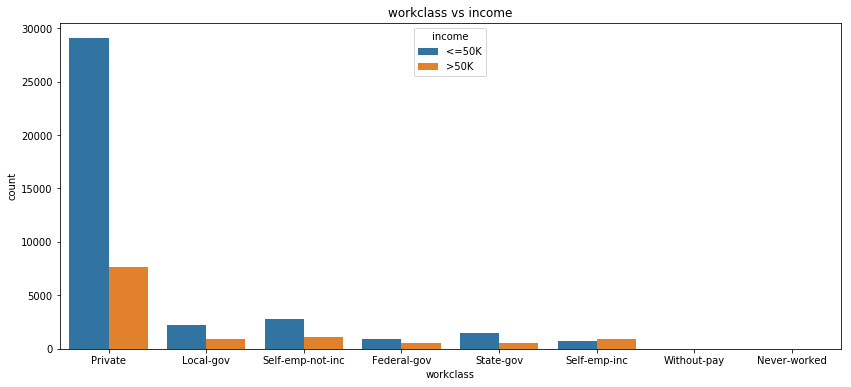

In [11]:
print(df.groupby('workclass').income.value_counts())
plt.figure(figsize=(14,6))
sns.countplot(x='workclass',hue='income',data=df)
plt.title('workclass vs income')


Below 2 cells says that column 'education' and 'educational-num' has same info. Hence dropping column 'education'

In [12]:
df.education.value_counts()
a = df.groupby('education').income.value_counts()
a.sort_values()


education     income
Preschool     >50K          1
1st-4th       >50K          8
5th-6th       >50K         27
9th           >50K         41
12th          >50K         48
7th-8th       >50K         62
Preschool     <=50K        82
10th          >50K         87
11th          >50K         92
Doctorate     <=50K       163
Prof-school   <=50K       217
1st-4th       <=50K       239
Assoc-acdm    >50K        413
Doctorate     >50K        431
5th-6th       <=50K       482
Assoc-voc     >50K        522
12th          <=50K       609
Prof-school   >50K        617
9th           <=50K       715
7th-8th       <=50K       893
Assoc-acdm    <=50K      1188
Masters       <=50K      1198
10th          <=50K      1302
Masters       >50K       1459
Assoc-voc     <=50K      1539
11th          <=50K      1720
Some-college  >50K       2063
HS-grad       >50K       2503
Bachelors     >50K       3313
              <=50K      4712
Some-college  <=50K      8815
HS-grad       <=50K     13281
Name: income, dtype

**Plot for Education vs income**

education     income
10th          <=50K      1302
              >50K         87
11th          <=50K      1720
              >50K         92
12th          <=50K       609
              >50K         48
1st-4th       <=50K       239
              >50K          8
5th-6th       <=50K       482
              >50K         27
7th-8th       <=50K       893
              >50K         62
9th           <=50K       715
              >50K         41
Assoc-acdm    <=50K      1188
              >50K        413
Assoc-voc     <=50K      1539
              >50K        522
Bachelors     <=50K      4712
              >50K       3313
Doctorate     >50K        431
              <=50K       163
HS-grad       <=50K     13281
              >50K       2503
Masters       >50K       1459
              <=50K      1198
Preschool     <=50K        82
              >50K          1
Prof-school   >50K        617
              <=50K       217
Some-college  <=50K      8815
              >50K       2063
Name: income, dtype

Text(0.5,1,'education vs income')

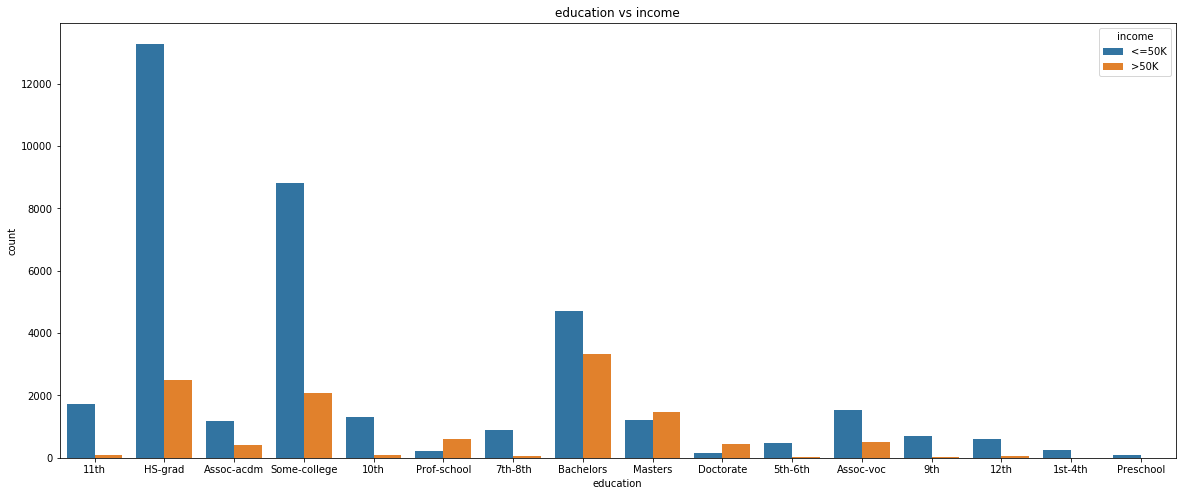

In [13]:
print(df.groupby('education').income.value_counts())
plt.figure(figsize=(20,8))
sns.countplot(x='education' ,hue='income',data=df)
plt.title('education vs income')

In [14]:
# drop education as educational num gives education details in numeric
df.drop(['education'],axis=1,inplace=True)



**Maritul-state VS Income plot**

marital-status         income
Divorced               <=50K      5962
                       >50K        671
Married-AF-spouse      <=50K        23
                       >50K         14
Married-civ-spouse     <=50K     12395
                       >50K       9984
Married-spouse-absent  <=50K       570
                       >50K         58
Never-married          <=50K     15384
                       >50K        733
Separated              <=50K      1431
                       >50K         99
Widowed                <=50K      1390
                       >50K        128
Name: income, dtype: int64


Text(0.5,1,'marital-status vs income')

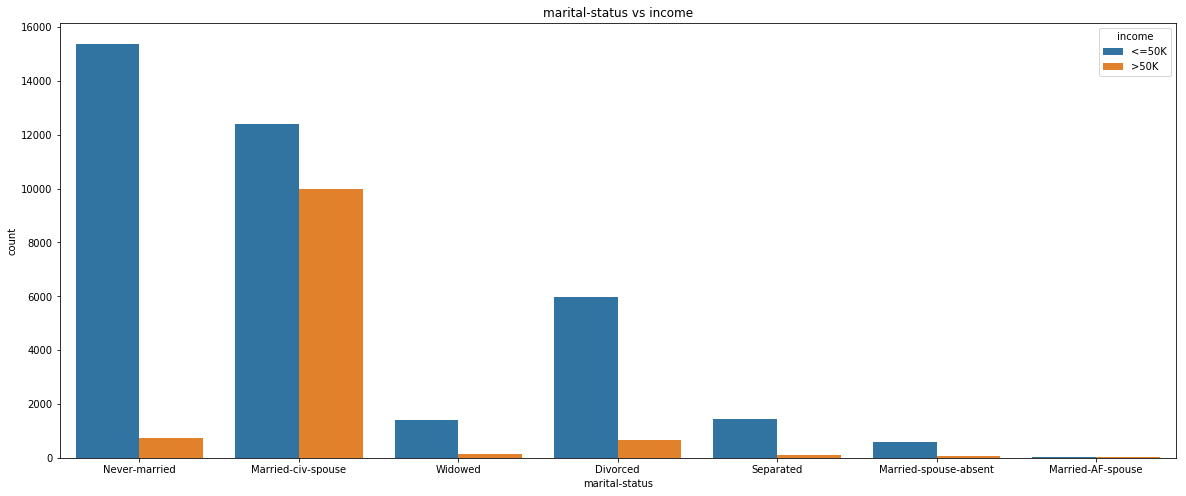

In [15]:
df['marital-status'].value_counts() #categorical data, need to convert to dummies
print(df.groupby('marital-status').income.value_counts())

plt.figure(figsize=(20,8))
sns.countplot(x='marital-status' ,hue='income',data=df)
plt.title('marital-status vs income')

Replacing NaN values by mode of this column and plotting occupation with income

In [16]:
df.occupation.isnull().sum() # we have 2809 null values, replacing them with mode. i.e Prof-specialty
df.occupation.value_counts()
df.groupby('occupation').income.value_counts()
df.occupation.fillna('Prof-specialty',inplace=True)

occupation         income
Adm-clerical       <=50K     4843
                   >50K       768
Armed-Forces       <=50K       10
                   >50K         5
Craft-repair       <=50K     4729
                   >50K      1383
Exec-managerial    <=50K     3178
                   >50K      2908
Farming-fishing    <=50K     1317
                   >50K       173
Handlers-cleaners  <=50K     1934
                   >50K       138
Machine-op-inspct  <=50K     2650
                   >50K       372
Other-service      <=50K     4719
                   >50K       204
Priv-house-serv    <=50K      239
                   >50K         3
Prof-specialty     <=50K     5932
                   >50K      3049
Protective-serv    <=50K      675
                   >50K       308
Sales              <=50K     4029
                   >50K      1475
Tech-support       <=50K     1026
                   >50K       420
Transport-moving   <=50K     1874
                   >50K       481
Name: income, dtype: i

Text(0.5,1,'occupation vs income')

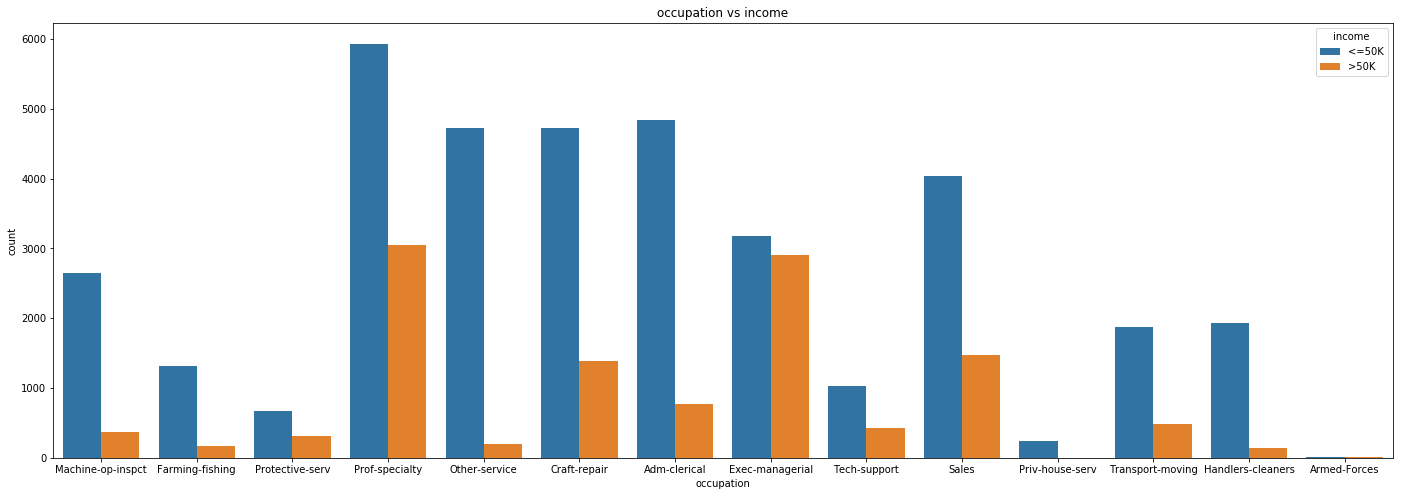

In [17]:
print(df.groupby('occupation').income.value_counts())

plt.figure(figsize=(24,8))
sns.countplot(x='occupation' ,hue='income',data=df)
plt.title('occupation vs income')

Replacing 857 NaN values by mode of the column i.e United-States

In [18]:
df['native-country'].isnull().sum()  # we have 857 null values, replacing them with mode. i.e United-States
df['native-country'].value_counts()
df['native-country'].fillna('United-States',inplace=True)

**Plot Gender VS Income**

gender  income
Female  <=50K     14423
        >50K       1769
Male    <=50K     22732
        >50K       9918
Name: income, dtype: int64


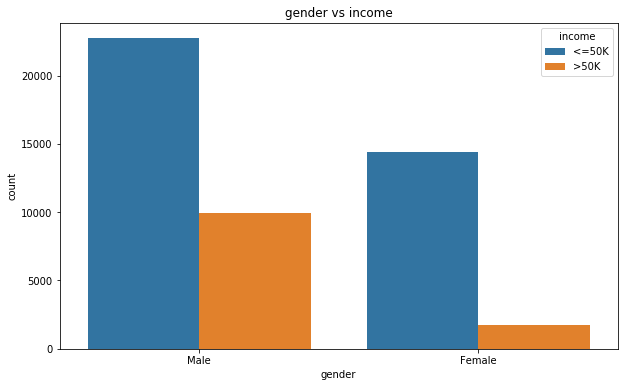

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='gender' ,hue='income',data=df)
plt.title('gender vs income')
print(df.groupby('gender').income.value_counts())

race                income
Amer-Indian-Eskimo  <=50K       415
                    >50K         55
Asian-Pac-Islander  <=50K      1110
                    >50K        409
Black               <=50K      4119
                    >50K        566
Other               <=50K       356
                    >50K         50
White               <=50K     31155
                    >50K      10607
Name: income, dtype: int64


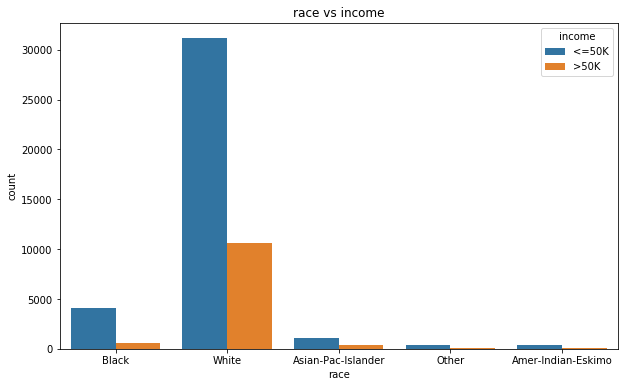

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='race' ,hue='income',data=df)
plt.title('race vs income')
print(df.groupby('race').income.value_counts())

**Binarizing label 'income'**

In [21]:
#converting label column 'income' to numeric, <=50K = 0 and >50K = 1
df.income.replace(('<=50K','>50K'),(0,1), inplace=True)
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


**Getting dummies for categorical values**

In [22]:
df = pd.get_dummies(df, drop_first=True)
print(df.columns.size)
print(df.columns)
df.head() 
#after creating dummies, we have 83 columns

83
Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Not-in-family',
       'relationship

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


**Separating features and label data for our model**

In [23]:
y = df['income']
df.drop(['income'],axis=1,inplace=True)
X = df
print(X.shape)
print(y.shape)


(48842, 82)
(48842,)


In [24]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,...,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.064207,0.000205,0.751505,0.034704,...,0.001372,0.003767,0.000430,0.002355,0.001331,0.000614,0.000553,0.914971,0.001761,0.000471
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.245124,0.014307,0.432145,0.183030,...,0.037012,0.061263,0.020731,0.048467,0.036457,0.024776,0.023506,0.278928,0.041925,0.021695
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Splitting data for train and test**

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
X_train.head()

(39073, 82)
(9769, 82)


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
37193,42,145175,10,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
31093,52,175029,6,0,0,35,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
33814,34,172664,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14500,28,125791,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
23399,46,28419,11,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


**Creating different models with no hyper parameter tuning and feature engineering**

** Random Forest base model with ccross validation: 84.91**

In [26]:
rf = RandomForestClassifier()
print(cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy').mean()*100)

84.73877429075809


**Logistic Regression base model with ccross validation: 79 **

In [27]:
log = LogisticRegression()
print(cross_val_score(log, X_train, y_train, cv=10, scoring='accuracy').mean()*100)


79.65854581667655


**Decision Tree base model with ccross validation: 81.26**

In [28]:
dt = DecisionTreeClassifier()
print(cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy').mean()*100)

81.20955503295534


**AdaBoost Classifier base model with ccross validation: 86.29**

In [29]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)  
print(cross_val_score(ada, X_train, y_train, cv=10, scoring='accuracy').mean()*100)


86.29488091851753


## **Using standardization and hyper parameter tuning using gridsearchcv and elbow method**

**Standardization**

In [30]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

**Random Forest with hyperparameter tuning with cross validation score: 81.46**

In [31]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid ={'criterion':['gini','entropy'],
          'n_estimators':[10,30,50,100,200,250],
           'max_depth' :[2,3,4],
             'n_jobs':[-1]
          }

grid = GridSearchCV(rf, param_grid, cv = 10)
print(grid.fit(X_train_std, y_train))

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [10, 30, 50, 100, 200, 250], 'max_depth': [2, 3, 4], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [32]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 10, 'n_jobs': -1}

In [33]:
rf = RandomForestClassifier(criterion='gini',max_depth=4,n_estimators=100,n_jobs=-1)
print(cross_val_score(rf, X_train_std, y_train, cv=10, scoring='accuracy').mean()*100)


81.36055163819344


**Logistic Regression with hyperparameter tuning with cross validation score:85.03 **

In [34]:

log = LogisticRegression()
param_grid = {
    'C': [.01,.1,1],
    'penalty':['l1','l2']
}

grid = GridSearchCV(log, param_grid, cv = 10)
print(grid.fit(X_train_std, y_train))


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [35]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [36]:
log = LogisticRegression(C=0.1,penalty='l2')
print(cross_val_score(log, X_train_std, y_train, cv=10, scoring='accuracy').mean()*100)


85.03824271156375


**Decision Tree with hyperparameter tuning with cross validation score: 85.68 **

In [37]:
dt = DecisionTreeClassifier(random_state=42)
param_grid ={'criterion':['gini','entropy'],
           'max_depth' :[2,3,4,5,6,7,8,9],
             'min_samples_split':[2,3,4,5],
             'min_samples_leaf':[2,3,4,5]
          }

grid = GridSearchCV(dt, param_grid, cv = 10)
print(grid.fit(X_train_std, y_train))

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [38]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [39]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=2,min_samples_split=2)
print(cross_val_score(dt, X_train_std, y_train, cv=10, scoring='accuracy').mean()*100)

85.68064467768714


** Adaboost classifier with hyperparameter tuning with cross validation score: **

In [40]:
ada = AdaBoostClassifier()
param_grid = [ {'n_estimators': [50,100,200,300], 'learning_rate':[0.01,0.1,1]}]

grid = GridSearchCV(ada, param_grid, cv = 10)
print(grid.fit(X_train_std, y_train))

GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [41]:
grid.best_params_

{'learning_rate': 1, 'n_estimators': 300}

In [42]:
ada = AdaBoostClassifier(learning_rate=1,n_estimators=300)
print(cross_val_score(ada, X_train_std, y_train, cv=10, scoring='accuracy').mean()*100)

86.73251498327744


**Results:**

**Base model cross validation score:**

Logistic Regression: 79.65

Decision Tree : 81.26

Random Forest:84.91

AdaBoost  Classifier: 86.29


**Cross validation score after hyper parameter tuning and feature engineering**

Logistic Regression: 85.03

Decision Tree : 85.68

Random Forest: 81.47

AdaBoost  Classifier: 86.73

**As AdaBoost  Classier is giving the best cross validation score, using it further for prediction**

**Build AdaBoost Classifier for predictions**

In [43]:
ada = AdaBoostClassifier(learning_rate=1,n_estimators=300)
ada.fit(X_train_std,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=300, random_state=None)

**Predictions**

In [44]:
pred_ada = ada.predict(X_test_std)
pred_ada

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

**Evaluation of Model**

In [45]:
print('Test accuracy using AdaBoost Classifier is :',metrics.accuracy_score(y_test,pred_ada)*100,'%')


Test accuracy using AdaBoost Classifier is : 85.77131743269526 %


In [46]:
print('Confusion matrix: \n\n',metrics.confusion_matrix(y_test,pred_ada))

Confusion matrix: 

 [[7022  457]
 [ 933 1357]]


In [47]:
print('Classification Report: \n\n',metrics.classification_report(y_test,pred_ada))

Classification Report: 

              precision    recall  f1-score   support

          0       0.88      0.94      0.91      7479
          1       0.75      0.59      0.66      2290

avg / total       0.85      0.86      0.85      9769

